# Time Series Forecasting for Covid-19 daily new  cases in St. Louis County using  Prophet

In [15]:
# Python
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('cases.csv')
print(df)

     State  County  Zip        Date
0     1267     387   13  08/13/2020
1     1245     289   10  08/14/2020
2     1127     256    7  08/15/2020
3     1342     187    5  08/16/2020
4     1148     150    9  08/17/2020
..     ...     ...  ...         ...
96    2562     772  203    12/15/20
97    2762     663  211    12/16/20
98    2673     478  225    12/17/20
99    3569     776  214    12/18/20
100   3723    1182  205    12/19/20

[101 rows x 4 columns]


In [17]:
df_Co = df[["Date","County"]]
df_Co = df_Co.rename(columns={'County': 'y', 'Date': 'ds'})
df_Co.head()

,ds,y
0,08/13/2020,387
1,08/14/2020,289
2,08/15/2020,256
3,08/16/2020,187
4,08/17/2020,150


In [18]:
train_data = df_Co.iloc[:len(df_Co)-10]
test_data = df_Co.iloc[len(df_Co)-10:]
print(test_data)

           ds     y
91   12/10/20   447
92   12/11/20   678
93   12/12/20  1383
94   12/13/20   549
95   12/14/20   595
96   12/15/20   772
97   12/16/20   663
98   12/17/20   478
99   12/18/20   776
100  12/19/20  1182


In [19]:
m = Prophet()
m.fit(train_data)
future = m.make_future_dataframe(periods=10)
prophet_pred = m.predict(future)
prophet_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
96,2020-12-15,804.765622,609.687254,997.082079
97,2020-12-16,766.847797,576.629736,967.294383
98,2020-12-17,792.909021,587.623317,993.494903
99,2020-12-18,856.063694,672.403391,1054.521602
100,2020-12-19,825.964702,640.218057,1019.746198


In [20]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-10:]['ds'], "Pred" : prophet_pred[-10:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred

,Pred
Date,
2020-12-10,746.162301
2020-12-11,809.316974
2020-12-12,779.217983
2020-12-13,725.481076
2020-12-14,695.600701
2020-12-15,804.765622
2020-12-16,766.847797
2020-12-17,792.909021
2020-12-18,856.063694


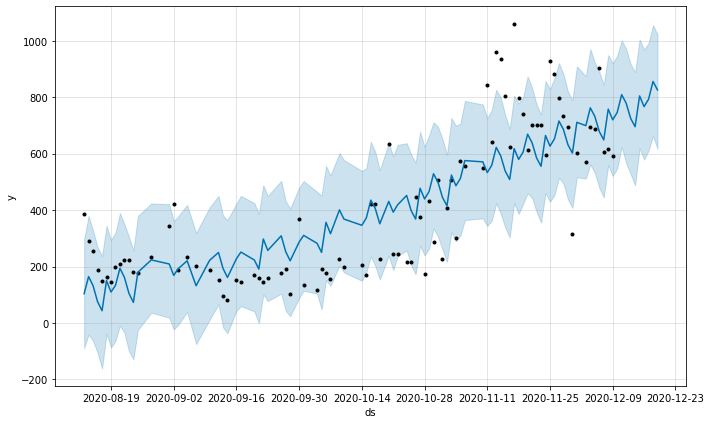

In [12]:
fig1 = m.plot(prophet_pred)

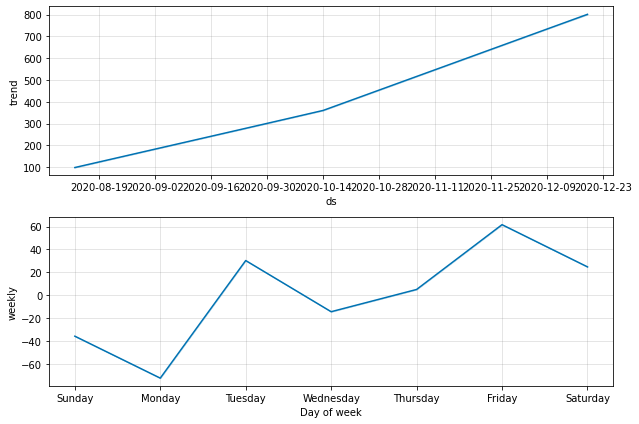

In [13]:
fig2 = m.plot_components(prophet_pred)


<ipython-input-21-b9d8127c6aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prophet_Predictions"] = prophet_pred['Pred'].values


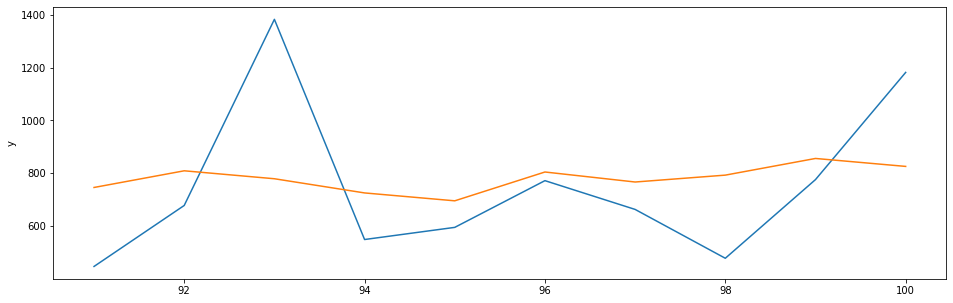

In [21]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["y"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [22]:
mse_error = mean_squared_error(test_data['y'], test_data["Prophet_Predictions"])
rmse_error = np.sqrt(mse_error)
mean_value = df['County'].mean()

print(f'MSE Error: {mse_error}\nRMSE Error: {rmse_error}\nMean: {mean_value}')

MSE Error: 75675.79964644791
RMSE Error: 275.0923474879807
Mean: 436.9306930693069
